# 1er livrable : Pré traitement
### Préparation de l'environnement

In [31]:
from PIL import Image
import numpy as np
import random
from numpy.linalg import norm

JPEG (528, 297) RGB


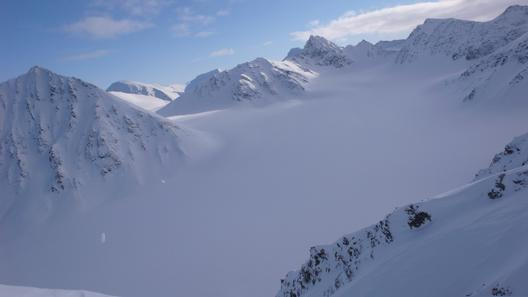

In [32]:
image = Image.open("H:\Desktop\ING3\TI\TI_Project\Images\Images\\2007041612_cam01p.jpg")
print(image.format, image.size, image.mode)
image

#### Les patches seront de taille 33, le plus grand PGCD entre 528 et 297. Toutefois, on peut prendre quasiment n'importe quelle taille de batch, sans perdre de pixel, dans ce code.

In [33]:
patch_size = 11 # patch size

#### Fonction d'extraction des patches dans une images :

In [34]:
def extract_patches(image, patch_size):
    width, height = image.size
    patches = []

    # Calculate the number of patches in each dimension
    num_patches_x = width // patch_size
    num_patches_y = height // patch_size

    # Loop through each patch
    for j in range(num_patches_y + 1):
        for i in range(num_patches_x + 1):
            # Calculate the coordinates of the patch
            x1 = i * patch_size
            y1 = j * patch_size
            x2 = min(x1 + patch_size, width)
            y2 = min(y1 + patch_size, height)

            # Extract the patch
            patch = image.crop((x1, y1, x2, y2))
            patches.append(patch)

    return patches

def patch2Vector(patch):
    patch_array = np.array(patch)
    return patch_array.flatten()



def vector2pacth(patch,pheight,pwidth,patch_size):
  if pheight != patch_size or pwidth != patch_size:
      patch = patch[:pheight*pwidth*3].reshape(pheight, pwidth, 3)
      patch_image = Image.fromarray(patch.astype('uint8')).convert("RGB")
  else:
      patch = patch.reshape(patch_size, patch_size, 3)
      patch_image = Image.fromarray(patch.astype('uint8')).convert("RGB")
  return patch_image

# permet de reconstruire un image a partir des patchs


def reconstImage(vector_patched, patch_size, img_size):
    image_reconstructed = Image.new("RGB", img_size)
    width, height = img_size
    patch_index = 0

    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            # Extract the patch from the list
            patch = vector_patched[patch_index]

            # Calculate the bounding box for pasting the patch
            box = (x, y, x + patch_size, y + patch_size)

            # If the patch size doesn't evenly divide the image size, adjust the box
            if x + patch_size > width or y + patch_size > height:
                patch_width = min(patch_size, width - x)
                patch_height = min(patch_size, height - y)
                box = (x, y, x + patch_width, y + patch_height)
                patch_image = vector2pacth(patch,patch_height,patch_width,patch_size)

            else:
                patch_image = vector2pacth(patch,patch_size,patch_size,patch_size)

            # Paste the patch onto the reconstructed image
            image_reconstructed.paste(patch_image, box)

            # Move to the next patch
            patch_index += 1

    return image_reconstructed

#### Patched_image sera donc composé de 144 patches de l'image initiale (16*9)

In [35]:
patched_image = extract_patches(image, patch_size)

In [36]:
patched_image[143]

### Transformation en vecteurs colonnes :

In [40]:
vectorised_img = [patch2Vector(patch) for patch in patched_image]
def supprimer_listes_nulles(liste):
    # Convertir les numpy arrays en listes de Python
    liste = [arr.tolist() for arr in liste]
    # Utilisation de la fonction filter() pour filtrer les listes vides
    liste_filtree = list(filter(None, liste))
    # Convertir les listes en numpy arrays
    liste_filtree = [np.array(arr) for arr in liste_filtree]
    return liste_filtree


vectorised_img = supprimer_listes_nulles(vectorised_img)
vectorised_img[143]
print(len(vectorised_img))

1296


Version a essayer qui fonctionne pour quasiment n'importe quelle taille de batch, j'ai un probléme pour qqu'une comme 22, je ne sais pas pourquoi..

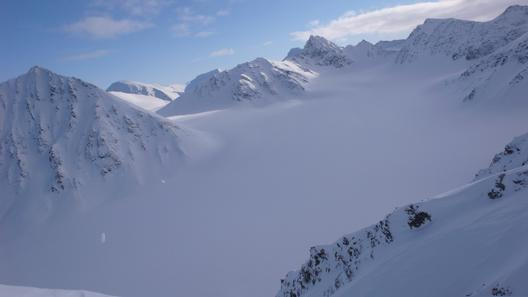

In [8]:
reconstructed_image = reconstImage(vectorised_img, patch_size, image.size)
reconstructed_image

Création du dictionnaire à partie de K vecteur normalisé issue de vectorised_img

In [44]:
def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    if norm == 0:
        return vector
    return vector / norm
vector_normaliser = [normalize_vector(vector) for vector in vectorised_img]
# print(vector_normaliser[0])
def select_k_distinct_elements(input_list, k):
    if k > len(input_list):
        raise ValueError("k ne peut pas être plus grand que la longueur de la liste.")
    
    selected_elements = random.sample(input_list, k)
    return selected_elements
# on a 1296 vecteur
K = 500

D = select_k_distinct_elements(vector_normaliser, K)

[array([0.04157415, 0.04520363, 0.05576215, 0.0419041 , 0.04553359,
       0.0560921 , 0.0419041 , 0.04553359, 0.0560921 , 0.04223405,
       0.04586354, 0.05576215, 0.04289396, 0.04652345, 0.05708196,
       0.04322391, 0.0468534 , 0.05675201, 0.04388382, 0.04751331,
       0.05807182, 0.04388382, 0.04751331, 0.05741191, 0.04388382,
       0.04751331, 0.05807182, 0.04388382, 0.04751331, 0.05741191,
       0.04421377, 0.04784326, 0.05840178, 0.04223405, 0.04586354,
       0.05642205, 0.04223405, 0.04586354, 0.05642205, 0.04487368,
       0.04850317, 0.05840178, 0.04520363, 0.04883312, 0.05807182,
       0.04586354, 0.04949303, 0.05939164, 0.04652345, 0.05015294,
       0.05939164, 0.04718336, 0.05081284, 0.06071145, 0.04751331,
       0.0511428 , 0.0603815 , 0.04784326, 0.05147275, 0.06137136,
       0.04784326, 0.05147275, 0.06071145, 0.04652345, 0.05015294,
       0.06005154, 0.04355387, 0.04718336, 0.05774187, 0.04388382,
       0.04751331, 0.05741191, 0.04520363, 0.04883312, 0.0580

Création de Notre matrice de Mesure Phi

In [10]:
n = len(vectorised_img[0])
print(n)
def PhiNormale(m): # Mesure obtenue par Loi normale (0,1/M), M quantité d'information des vecteurs de base ex:25%
    A=np.random.normal(0,1/np.sqrt(m),(m,n))
    return A
Mesure = PhiNormale(25) # tester différente valeur de m
print(np.shape(Mesure))

363
(25, 363)


In [11]:
# Construcion de la matrice de référence
l = 150
# prendre l vecteurs aléatoires de vectored_img
X = select_k_distinct_elements(vectorised_img, l) # l vecteurs aléatoires
X = np.array(X)
print(np.shape(X))

(150, 363)
range(0, 500)


In [17]:
def OMP(X,D,kmax,eps):
    R = X #création du résiduel
    alpha = np.zeros(len(D[0])) # création de alpha
    support = []
    k = 0
    m =[0 for i in range (len(D[0]))]
    while np.linalg.norm(R) > eps and k < kmax : # critere d'arret
        #print(R)
        for j in range (len(D[0])):
            dj = np.array(D[:,[j]])
            m[j] = abs((np.vdot(dj,R)) / (np.linalg.norm(dj)))
        mk=np.argmax(m)
        support.append(mk)
       # print(len(support),"test")
        #print(support)
        phi = np.array(D[:,support])
       # print(phi)
        alpha[support] = (np.linalg.pinv(phi)).dot(X)
        R = X-D.dot(alpha)
        k=k+1
    return (alpha)

In [25]:
def realisationDeOMP(X,K,Nmax,eps):
  (N,l)=X.shape
  alpha=np.zeros((K,len(X[0])))
  #Nombre d'iteration maximal à effectuer pour OMP
  MAX_bruiteeITR=np.round(K/10)
  D0=Initialisation_dictionnaire(X,K)

  for i in range(1,l):
    alpha[:,i]=OMP(X[:,i],D0,10,eps)
  return alpha

In [29]:
alpha = realisationDeOMP(X,150,10,0.1)

In [30]:
alpha.shape

(150, 363)